## Load Libraries

In [30]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score

## Data Acuisition

In [4]:
#make data frame
data = pd.read_csv("ortho_knnnb.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
#showing some info to data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


## EDA

In [6]:
# getting discriptive statistcs (Summary of the data)
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


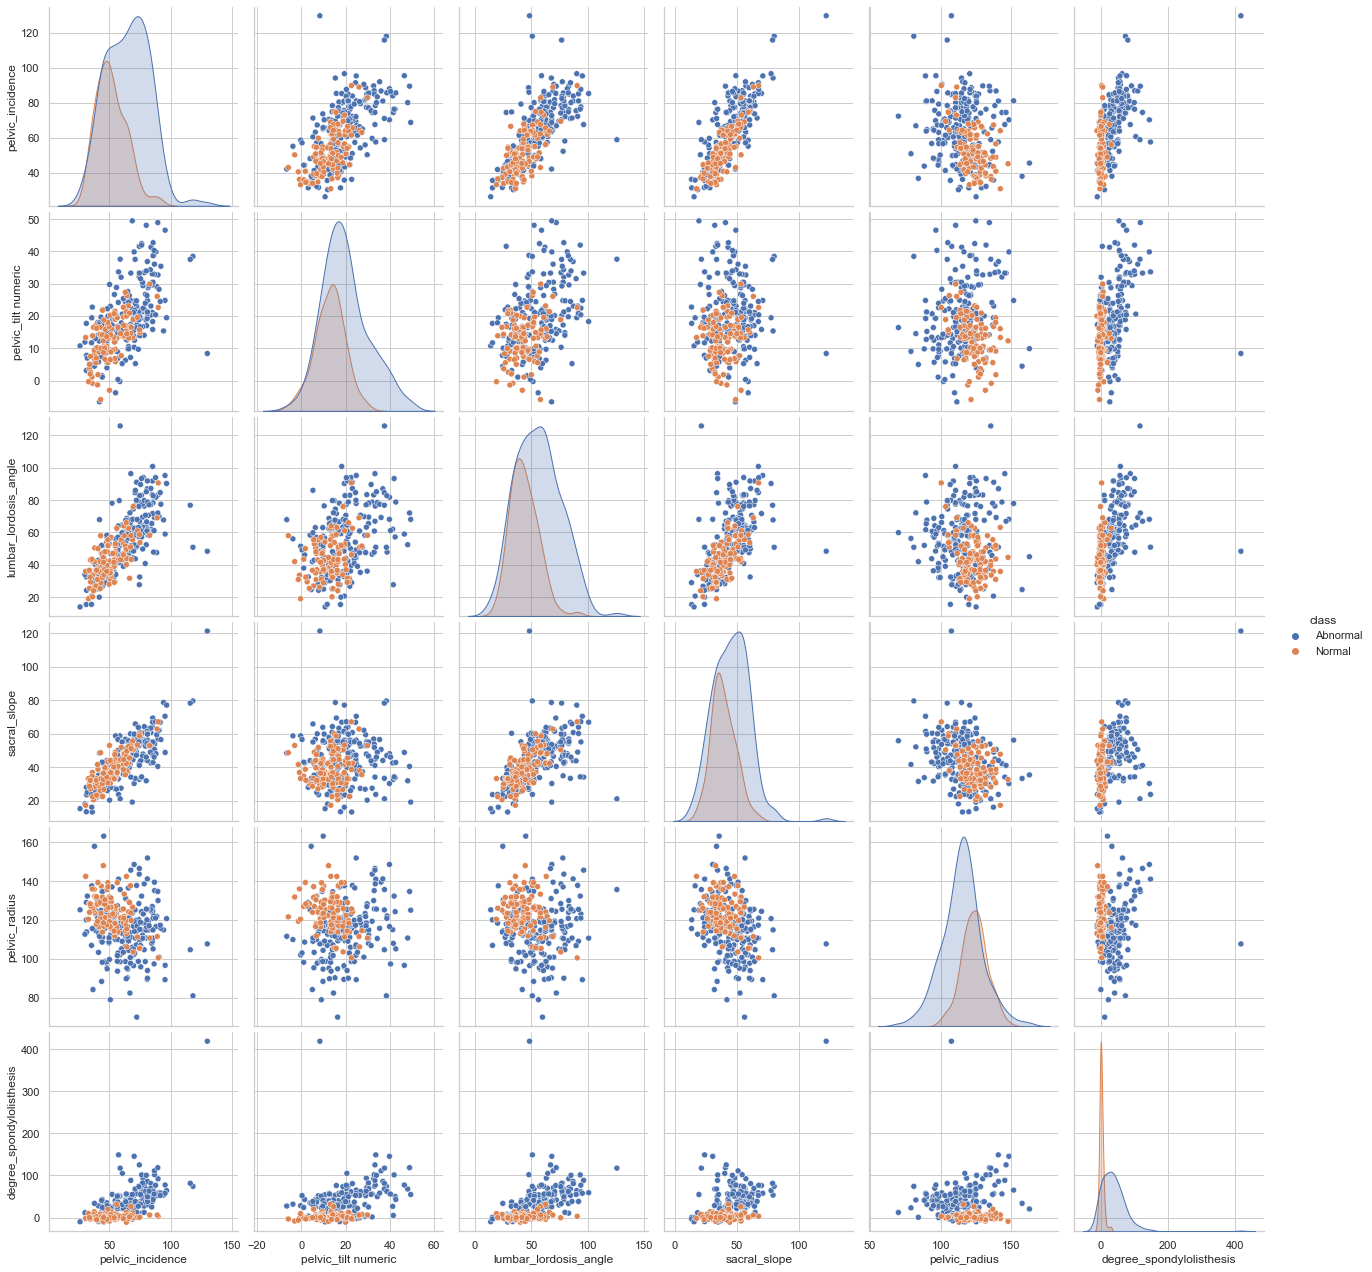

In [7]:
#Highlevel pairplots to get an understanding some of the more dependent factors

sns.set_style("whitegrid");
sns.pairplot(data, hue="class", size=3);
plt.show()

#it would seem 'degree_spondylolisthesis' has a bit more seperation 
#than any other variable when paired.

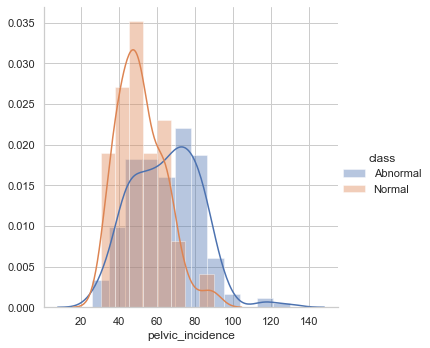

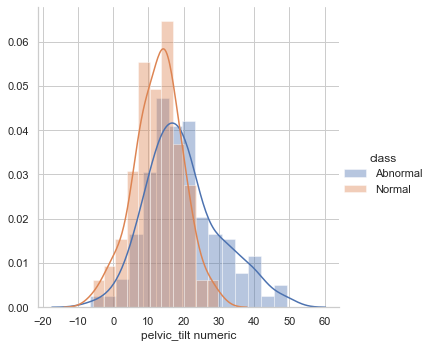

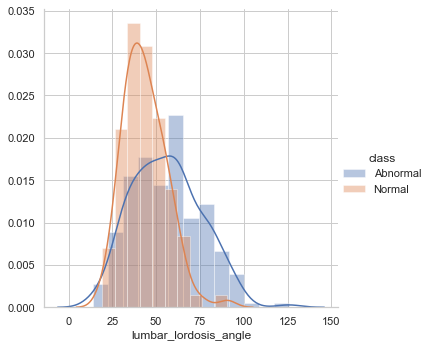

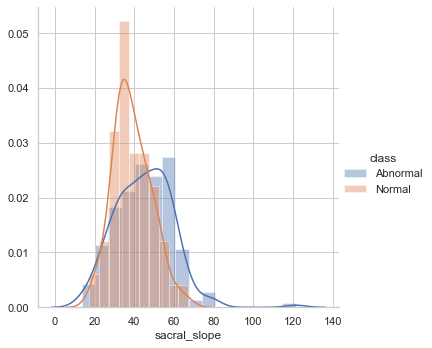

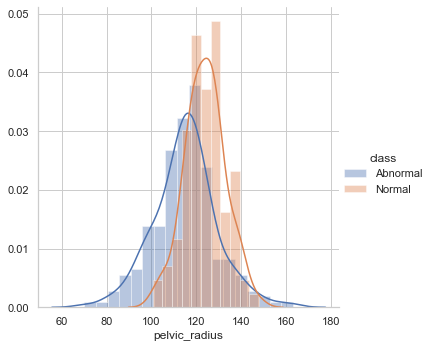

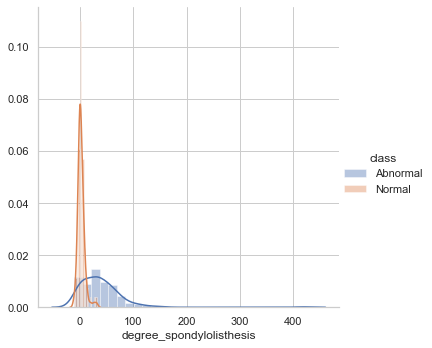

In [9]:
for name in data.columns.values[:-1]:
    sns.FacetGrid(data, hue="class", size=5).map(sns.distplot, name).add_legend()
plt.show()

#very minimal seperation, only 'degree_spondylolisthesis' seeems promosing

<AxesSubplot:>

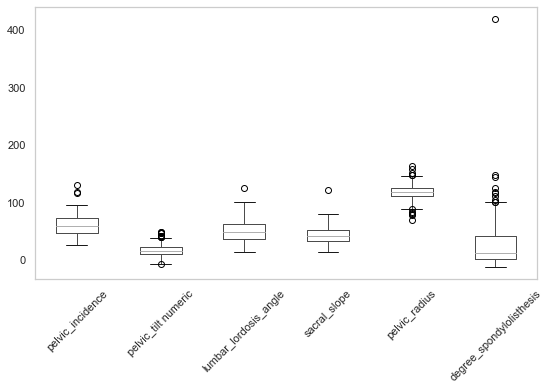

In [11]:
data.boxplot(column= ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle'
                      , 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],figsize=(9,5),grid = False, rot=45)

In [12]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

#No missing values

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [13]:
# Extracting dataframe for only 'Object' datatypes
data_ct = data.select_dtypes(include='object')
data_ct.head()

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal


In [14]:
# Extracting dataframe for only 'number' datatypes
data_num = data.select_dtypes(include=['float64','int64'])
data_num.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [16]:
#data points for each class
data['class'].value_counts()

#there seems to be more abnormalities on people than 
#what is considered normal

Abnormal    210
Normal      100
Name: class, dtype: int64

In [17]:
#Constructing correlation Matrix
corr = data.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


## Training Data

In [18]:
# Splitting Data set into train and validation

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20,random_state = 1)

#considering only highly correlated features for training and validation
train_x = train.drop(['class'], axis = 1)
train_y = train['class']             

test_x = test.drop(['class'],axis = 1)
test_y = test['class']

In [19]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (248, 6)
Dimension of train_y : (248,)
Dimension of test_x : (62, 6)
Dimension of test_y : (62,)


## Naive Bayes

In [20]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_x, train_y)

GaussianNB()

In [32]:
#Predicting the Test set results
pred_y = nvclassifier.predict(test_x)
print(pred_y)

['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal']


In [33]:
#lets see the actual and predicted value ***(important)***
test = test.reset_index(drop = True)
test["pred_class"] = pred_y
test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,pred_class
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,Abnormal,Abnormal
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,Normal,Abnormal
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,Abnormal,Abnormal
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,Abnormal,Abnormal
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,Abnormal,Abnormal


              precision    recall  f1-score   support

    Abnormal       0.94      0.79      0.86        42
      Normal       0.67      0.90      0.77        20

    accuracy                           0.82        62
   macro avg       0.80      0.84      0.81        62
weighted avg       0.85      0.82      0.83        62

---------------------------------------------
The accuracy of the Model 0.8225806451612904
---------------------------------------------
ROC_AUC is 0.9095238095238095 and accuracy rate is 0.8225806451612904


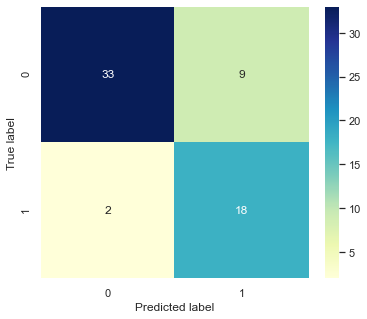

In [39]:
#Check precision, recall, f1-score
print( classification_report(test_y, pred_y) )

#Interesting that test_y & pred_y gives same results as
#test_x & test_y
print('---------------------------------------------')
print( "The accuracy of the Model",accuracy_score(test_y, pred_y))

auc = roc_auc_score(test_y, nvclassifier.predict_proba(test_x)[:,1])
print('---------------------------------------------')
print('ROC_AUC is {} and accuracy rate is {}'.format(auc, nvclassifier.score(test_x, test_y)))


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_y)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [40]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("*"*70)
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print("*"*70)
acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(acc*100,2)))
print("*"*70)

**********************************************************************
Correct predictions:  51
False predictions 11
**********************************************************************
Accuracy of the Naive Bayes Clasification is 82.26% 
**********************************************************************


## KNN

In [41]:
#Using KNN Classifier for model building 

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_x, train_y)

# Predict Species for test data
pred = KNN.predict(test_x)

In [42]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the KNN with K=3 is 83.87%


## Tuning Parameters using w/ Hyperparameter Tuning

In [43]:
# Tunings Parameters without Grid Search Hyperparameter tuning

train_accuracy = []
test_accuracy = []

for k in range(1,16):                                 # K from 1 to 15
    KNN = KNeighborsClassifier(n_neighbors=k)         #KNN Classifier with K = k
    KNN.fit(train_x, train_y)
#######################################################################################
    train_pred = KNN.predict(train_x)                 #prediction on trian data
    train_score = accuracy_score(train_pred,train_y)  #Train accuracy
    train_accuracy.append(train_score)
    
#######################################################################################
    test_pred = KNN.predict(test_x)                   #prediction on test data
    test_score = accuracy_score(test_pred,test_y)     #test accuracy
    test_accuracy.append(test_score)  
    
#######################################################################################

print("Best accuracy is {} with K = {}".format(max(test_accuracy),1+test_accuracy.index(max(test_accuracy))))

Best accuracy is 0.8548387096774194 with K = 1


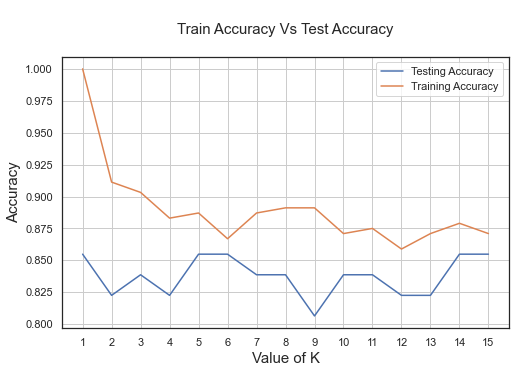

In [44]:
#Accuracy Plot
plt.figure(figsize=[8,5])
plt.plot(range(1,16), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,16), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('\nTrain Accuracy Vs Test Accuracy\n',fontsize=15)
plt.xlabel('Value of K',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xticks(range(1,16))
plt.grid()
plt.show()

## Tuning Parameters w/ GridSearch Cross Validation

In [49]:
# Tuning Parameters using Grid search cross validation 
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors": list(range(1,16,1)), 'metric': ['euclidean','manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
grid_knn.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]})

In [47]:
#KNN best estimator
knn_besthypr = grid_knn.best_estimator_
knn_besthypr

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [50]:
#Print hyperparameter
print("Tuned hyperparameter: {}".format(grid_knn.best_params_)) 
print("Best score: {}".format(grid_knn.best_score_))

Tuned hyperparameter: {'metric': 'euclidean', 'n_neighbors': 15}
Best score: 0.8586938775510203


In [51]:
#Using best hyperparameter

knn = knn_besthypr.fit(train_x,train_y)
y_pred = knn.predict(test_x)
acc = accuracy_score(y_pred,test_y)
print('The accuracy of the KNN with K = {} is {}%'.format(knn_besthypr.n_neighbors,round(acc*100,2)))

The accuracy of the KNN with K = 15 is 85.48%


Both methods gave an optimisation accuracy of 85.48% except the hyperparameter gave the best result at k=1 while the cross validation gave the same results at k=15. I would go with the cross validation method because k=1 gives too much bias and a k=15 is preffered.

In [52]:
#lets see the actual and predicted value 
test = test.reset_index(drop = True)
test["pred_species"] = pred
test.head()


#pred_class is the prediction using NB model
#pred_species is the prediction
#note that i'm using the original data frame but
#only because I didn't have to do changes to it; else, I 
#would make a copy and use the copy to append results

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,pred_class,pred_species
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,Abnormal,Abnormal,Abnormal
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,Normal,Abnormal,Normal
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,Abnormal,Abnormal,Abnormal
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,Abnormal,Abnormal,Abnormal
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,Abnormal,Abnormal,Abnormal


In [53]:
#making sure no append changes were influence on the training data like adding columns and such
#This is the same training data that was used for both NB and KNN to have some consistancy.
#There are cases where the target data has to be weighted/extrapolated so every model needs it's 
#training set up tp avoid a mix up and strange results.
train_x.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

              precision    recall  f1-score   support

    Abnormal       0.88      0.88      0.88        42
      Normal       0.75      0.75      0.75        20

    accuracy                           0.84        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.84      0.84      0.84        62

---------------------------------------------
The accuracy of the Model 0.8387096774193549
---------------------------------------------
ROC_AUC is 0.9410714285714287 and accuracy rate is 0.8548387096774194


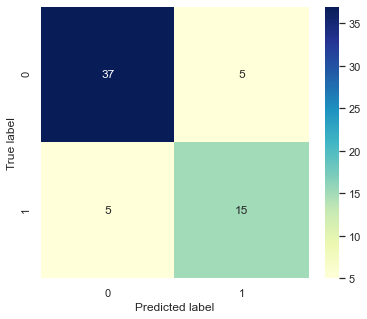

In [54]:
#Check precision, recall, f1-score
print( classification_report(test_y, pred) )

#Interesting that test_y & pred_y gives same results as
#test_x & test_y
print('---------------------------------------------')
print( "The accuracy of the Model",accuracy_score(test_y, pred))

auc = roc_auc_score(test_y, KNN.predict_proba(test_x)[:,1])
print('---------------------------------------------')
print('ROC_AUC is {} and accuracy rate is {}'.format(auc, KNN.score(test_x, test_y)))


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()